In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
g = 9.81  # m/s

In [45]:
class Gas(object):
 
    def __init__(self, rho, lmbda, mu, Cp, beta):
 
        self.rho = rho  # kg/m3
        self.lmbda = lmbda  # W/m/K
        self.mu = mu # kg/m/s
        self.Cp = Cp # J/kg/K
        self.beta = beta # 1/K
        
    @property
    def Prandtl(self):
        Pr = self.Cp * self.mu / self.lmbda
        return Pr

In [46]:
air = Gas( 1.29, 2.5e-2, 1.86e-5, 1.005e3, 3.67e-3 )

In [47]:
air.Prandtl

0.74772

In [157]:
class Gap(object):
    
    def __init__(self, gas, thickness):
        
        self.gas = gas
        self.w = thickness
        
    @property
    def beta(self):
        return 1/self.w
        
        
    @beta.setter
    def beta(self, val):
        self.w = 1/val
        
    def Grashoff(self, deltaT):
        deltaT = np.abs( deltaT )
        gas = self.gas
        Gr = g * gas.beta*gas.rho**2*self.w**3 / gas.mu**2 * deltaT
        return Gr
    
    def Nusselt(self, deltaT):
        
        deltaT = np.asarray( deltaT )
        
        GrPr = self.gas.Prandtl * self.Grashoff( deltaT )

        condlist = [ GrPr < 5e3,
                     np.logical_and( GrPr>5e3 , GrPr<6e4 ),
                     np.logical_and( GrPr>6e6 , GrPr<1.5e5 ), 
                     GrPr > 1.5e5  ]
        funclist = [ 1,
                     lambda x: 0.0429 * x**0.37 ,
                     lambda x: 0.43 * x**0.16 ,
                     lambda x: 0.0354 * x**0.37  ]
        
        Nu = np.piecewise(GrPr, condlist, funclist)

        return Nu
        
    def h(self, deltaT):
        """ conductance en W/m2/K
        """
        h = self.gas.lmbda / self.w * self.Nusselt( deltaT )
        return h

In [152]:
my_gap = Gap( air, 1 )

In [153]:
my_gap.h( -10 )

2.0819365187167338

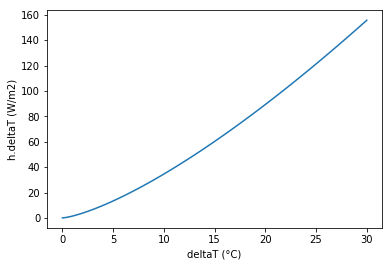

In [161]:
my_gap = Gap( air, 1e2 )

deltaT = np.linspace( 0, 30, 100 )
plt.plot( deltaT, my_gap.h( deltaT )*deltaT )
plt.xlabel('deltaT (°C)'); plt.ylabel('h.deltaT (W/m2)');